**Importing the required libraries**

In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# for applying descriptive statistics
from scipy import stats
from scipy.stats import norm
# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#for selecting the best feature effecting the target variable
from sklearn.feature_selection import SelectKBest,chi2,f_regression
# for splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
# regression metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**Load the dataset**

In [113]:
dataset=pd.read_csv('C:/Users/shruti/Desktop/tableau datasets/listings.csv')

**Taking a look at the dataset**

In [114]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


**Checking the data types of all the features**

In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
id                                7907 non-null int64
name                              7905 non-null object
host_id                           7907 non-null int64
host_name                         7907 non-null object
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
latitude                          7907 non-null float64
longitude                         7907 non-null float64
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       5149 non-null object
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(3

In [116]:
dataset['name'].nunique()

7457

In [117]:
dataset['neighbourhood'].nunique()

43

**Dropping the unnecessary columns**

In [118]:
dataset.drop(['id','name','host_name','host_id','last_review'],axis=1,inplace=True)

In [119]:
dataset.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


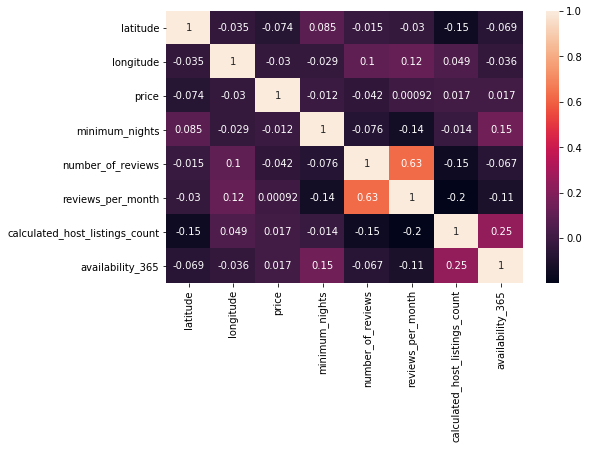

In [120]:
plt.figure(figsize=(8,5))
correlation_matrix=dataset.corr()
sns.heatmap(correlation_matrix,annot=True)

**Here we can see that 'number_of_reviews' and 'reviews_per_month' are correlated with each other and hence one of them must be dropped in order to get better results from our model.**

In [121]:
dataset.drop(['reviews_per_month'],axis=1,inplace=True)

In [122]:
dataset.shape

(7907, 10)

In [123]:
cat=[f for f in dataset.columns if dataset.dtypes[f]=='object']
def anova(frame):
    anova_data=pd.DataFrame()
    anova_data['Features']=cat
    pvals=[]
    for c in cat:
        samples=[]
        for cls in frame[c].unique():
            s=frame[frame[c]==cls]['price'].values
            samples.append(s)
        pval=stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anova_data['pvalues']=pvals
    return anova_data.sort_values('pvalues')
categorical['price'] = dataset.price.values
k = anova(categorical) 
k['disparity'] = np.log(1./k['pvalues'].values) 
sns.barplot(data=k, x = 'Features', y='disparity') 
plt.xticks(rotation=90) 
plt 

ValueError: Length of values does not match length of index

**Checking for missing values**

In [ ]:
dataset.isnull().sum()

**Checking for  univariate outliers using boxplot**

In [ ]:
names=['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']
plt.figure(figsize=(10,9))
for i in range(1,8):
    
    plt.subplot(2,4,i)
    fig=dataset.boxplot(column=names[i-1])

**Checking the distribution of each numerical feature to decide the method of detecting outliers for each of them**

C:\Users\shruti\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


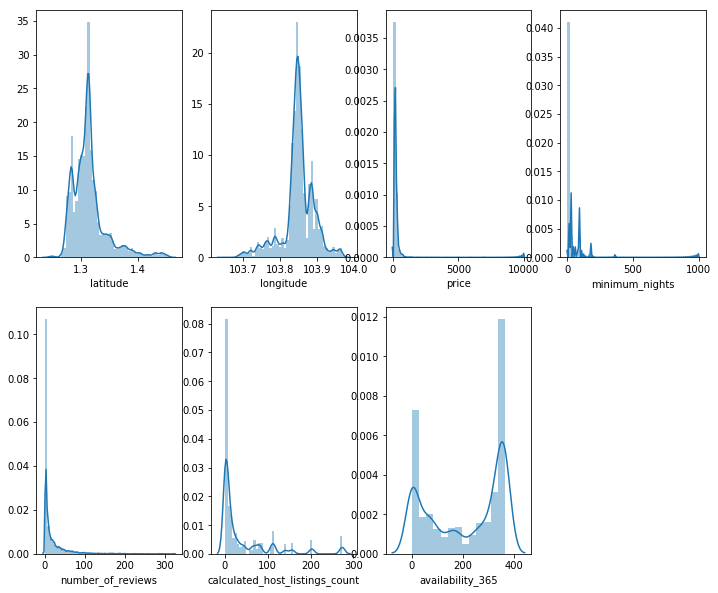

In [124]:
plt.figure(figsize=(12,10))
for j in range(1,8):
    plt.subplot(2,4,j)
    sns.distplot(dataset[names[j-1]])

**For all those who following a normal distribution they can use 'Z-Score' method for detecting outliers**

In [125]:
#for latitude
std=np.std(dataset['latitude'])
mean=np.mean(dataset['latitude'])
median=np.median(dataset['latitude'])
outliers=[]
for x in dataset['latitude']:
    zscore=(x-mean)/std
    if zscore>abs(3):
        outliers.append(x)

In [126]:
len(outliers)

176

**Removing the outliers by imputing them with median value**

In [127]:
dataset_new=dataset.replace(outliers,median)

Text(0.5, 1.0, 'after removing outliers')

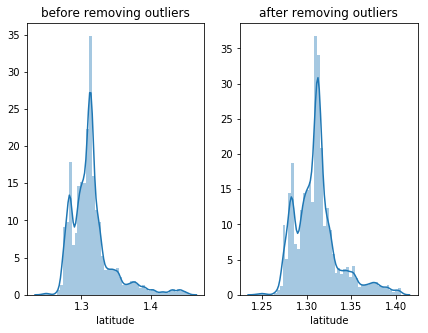

In [128]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
fig=sns.distplot(dataset['latitude'])
plt.title('before removing outliers')
plt.subplot(1,2,2)
fig2=sns.distplot(dataset_new['latitude'])
plt.title('after removing outliers')

In [129]:
#for longitude
std=np.std(dataset['longitude'])
mean=np.mean(dataset['longitude'])
median=np.median(dataset['longitude'])
outliers=[]
for x in dataset['longitude']:
    zscore=(x-mean)/std
    if -3<zscore>3:
        outliers.append(x)

In [130]:
len(outliers)

0

In [131]:
#for minimum_nights
q1=dataset['minimum_nights'].quantile(0.25)
q3=dataset['minimum_nights'].quantile(0.75)
outlier=[]
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
for i in dataset['minimum_nights']:
    if i<lower_bound or i>upper_bound:
            outlier.append(i)        

In [132]:
len(outlier)

1407

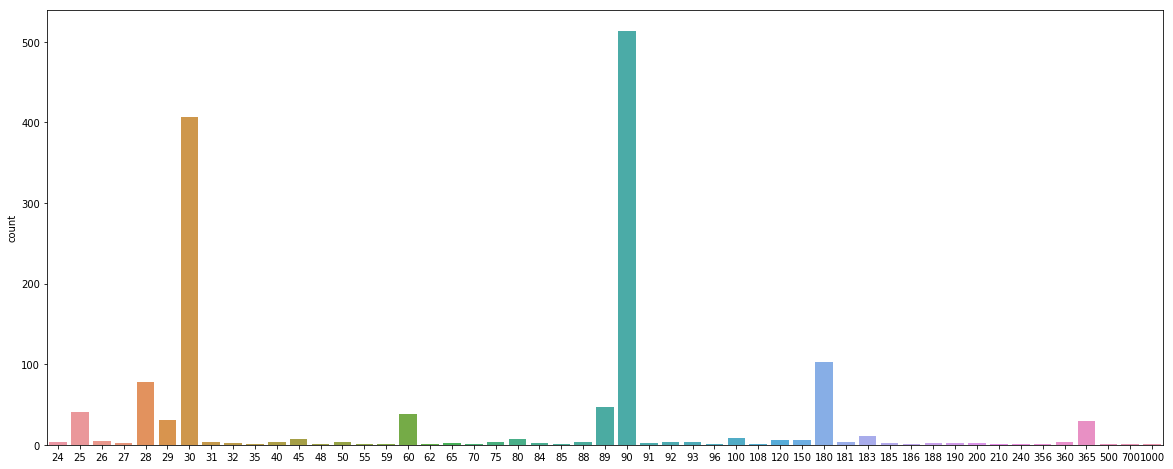

In [133]:
plt.figure(figsize=(20,8))
sns.countplot(outlier)

* Here we can see that after '365' there is a sudden increase in number of minimum nights which is not desirable as the hosts at air-bnb provide a maximum of one year stay in the form of rent to the visitors i.e of 365 days.
* So all the values above 365 are considered as outliers. For eg : 1000 number of minimum nights is next to impossible.
* Such values are supposed to get filtered out.

In [134]:
dataset_new=dataset[dataset['minimum_nights']<=365]

Text(0.5, 1.0, 'after removing outliers')

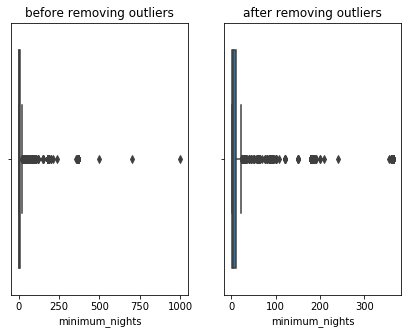

In [135]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
sns.boxplot(dataset['minimum_nights'])
plt.title('before removing outliers')
plt.subplot(1,2,2)
sns.boxplot(dataset_new['minimum_nights'])
plt.title('after removing outliers')

**Now the scale of values has been changed and after filtering out the outlier values we get a maximum of 365 number of nights**

In [136]:
#for calculated_host_listings_count
q1=dataset['calculated_host_listings_count'].quantile(0.25)
q3=dataset['calculated_host_listings_count'].quantile(0.75)
outlier=[]
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
for i in dataset['calculated_host_listings_count']:
    if i<lower_bound or i>upper_bound:
            outlier.append(i)        

In [137]:
len(outlier)

775

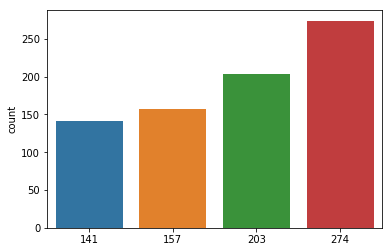

In [138]:
sns.countplot(outlier)

**These values that are detected as outliers according to upper and lower bound rule are not outliers as values like '274','203','157' and '141' can be a count of host listings on air-bnb. So these values are left untouched.**

In [139]:
dataset_new.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,1,365
2,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2,365
3,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,9,353
4,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,9,355


In [140]:
df=dataset_new.copy()

In [141]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,1,365
2,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2,365
3,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,9,353
4,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,9,355


**Now looking for the categorical features in the dataset**

In [142]:
dataset_new['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

**As there are only three levels of categories in 'room_type' feature we can map them with certain values**

In [143]:
mappings={'Entire home/apt':1,'Private room':2,'Shared room':3}
dataset_new['room_type']=dataset_new['room_type'].map(mappings)

C:\Users\shruti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [144]:
dataset_new.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,2,83,180,1,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,2,81,90,18,1,365
2,North Region,Woodlands,1.44246,103.79667,2,69,6,20,2,365
3,East Region,Tampines,1.34541,103.95712,2,206,1,14,9,353
4,East Region,Tampines,1.34567,103.95963,2,94,1,22,9,355


In [145]:
dataset_new['neighbourhood'].unique()

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bedok', 'Bukit Merah',
       'Newton', 'Geylang', 'River Valley', 'Jurong West', 'Rochor',
       'Queenstown', 'Serangoon', 'Marine Parade', 'Pasir Ris',
       'Toa Payoh', 'Outram', 'Punggol', 'Tanglin', 'Hougang', 'Kallang',
       'Novena', 'Downtown Core', 'Bukit Panjang', 'Singapore River',
       'Orchard', 'Ang Mo Kio', 'Bukit Batok', 'Museum', 'Sembawang',
       'Choa Chu Kang', 'Central Water Catchment', 'Sengkang', 'Clementi',
       'Jurong East', 'Bishan', 'Yishun', 'Mandai', 'Southern Islands',
       'Sungei Kadut', 'Western Water Catchment', 'Tuas', 'Marina South',
       'Lim Chu Kang'], dtype=object)

In [146]:
len(dataset_new['neighbourhood'].unique())

43

**As there are total 43 levels in 'neighbourhood' feature we can go for Binary Encoder so as to prevent dimensionality reduction by using one hot encoding**

In [147]:
import category_encoders as ce
binary=ce.BinaryEncoder(cols=['neighbourhood'])
dataset_new=binary.fit_transform(dataset_new)

In [148]:
dataset_new.head(10)

,neighbourhood_group,neighbourhood_0,neighbourhood_1,neighbourhood_2,neighbourhood_3,neighbourhood_4,neighbourhood_5,neighbourhood_6,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,North Region,0,0,0,0,0,0,1,1.44255,103.79580,2,83,180,1,2,365
1,Central Region,0,0,0,0,0,1,0,1.33235,103.78521,2,81,90,18,1,365
2,North Region,0,0,0,0,0,0,1,1.44246,103.79667,2,69,6,20,2,365
3,East Region,0,0,0,0,0,1,1,1.34541,103.95712,2,206,1,14,9,353
4,East Region,0,0,0,0,0,1,1,1.34567,103.95963,2,94,1,22,9,355
5,East Region,0,0,0,0,0,1,1,1.34702,103.96103,2,104,1,39,9,346
6,East Region,0,0,0,0,0,1,1,1.34348,103.96337,2,208,1,25,9,172
7,East Region,0,0,0,0,1,0,0,1.32304,103.91363,2,50,90,174,4,59
8,East Region,0,0,0,0,1,0,0,1.32458,103.91163,2,54,90,198,4,133
9,East Region,0,0,0,0,1,0,0,1.32461,103.91191,2,42,90,236,4,147


**Now splitting the dataset into dependent and independent features**

In [149]:
x=dataset_new.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15]].values
y=dataset_new.iloc[:,11:12].values

In [150]:
dataset['neighbourhood_group'].unique()

array(['North Region', 'Central Region', 'East Region', 'West Region',
       'North-East Region'], dtype=object)

**As there are 5 levels and the values are nominal type we can perform label encoding**

In [151]:
# In the ndarray of independent features 'neighbourhood_group' is at 0th position
label=LabelEncoder()
x[:,0]=label.fit_transform(x[:,0])

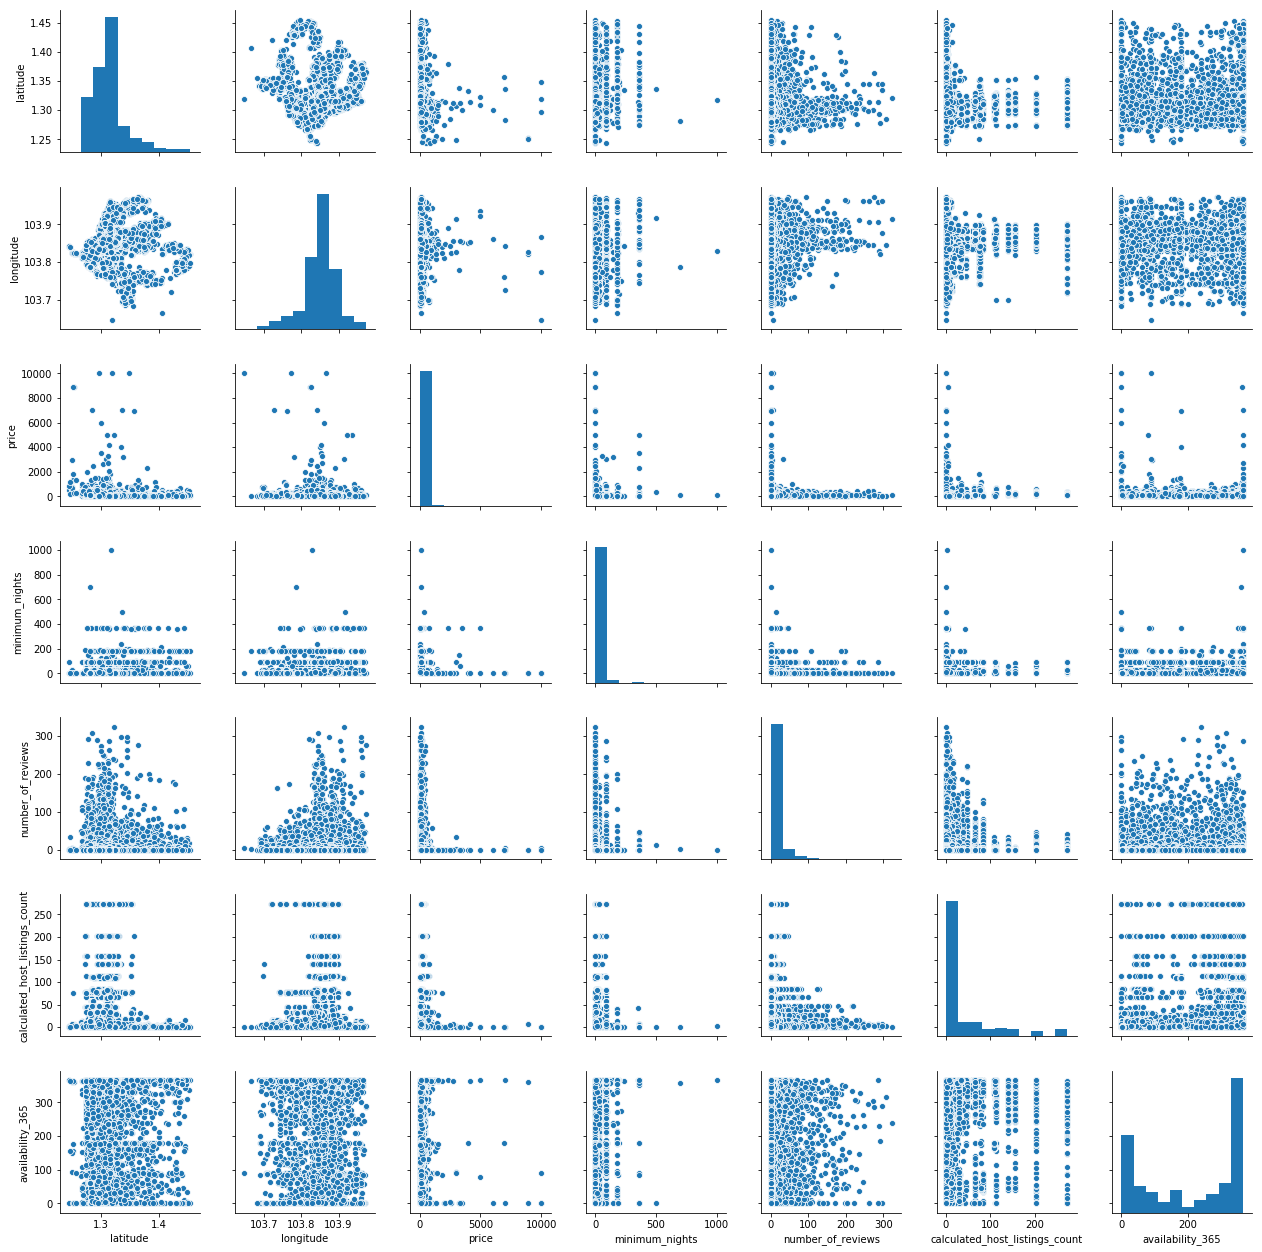

In [152]:
sns.pairplot(dataset)

**As the features are not having linear relationship with each other we cant use linear regression model.Instead we can go for SVR.**

In [153]:
# scaling the features is necessary to implement svr 
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

C:\Users\shruti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shruti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shruti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shruti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**Splitting into train and test data**

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Fitting the train data to the model and making out the predictions**

In [155]:
regressor=SVR(kernel='rbf')
regressor.fit(x_train,y_train)
predictions=regressor.predict(x_test)

C:\Users\shruti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shruti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [156]:
predict=pd.DataFrame(predictions)
ytest=pd.DataFrame(y_test)
resultant=pd.concat([predict,ytest],axis=1)

In [157]:
resultant.columns=['Predicted_values','Actual_values']

In [158]:
resultant.head()

,Predicted_values,Actual_values
0,-0.220239,-0.350744
1,-0.244146,-0.233175
2,0.115500,0.560421
3,0.050495,0.351735
4,0.268621,0.328221


In [159]:
mae=mean_absolute_error(y_test,predictions)
rmse=sqrt(mean_squared_error(y_test,predictions))

In [160]:
mae

0.24124913992995664

* Usually mae ranges from 0 to infinity and lower the value better are the predictions.
* So a value of 0.33 indicates that the model can give good predictions 

In [161]:
rmse

1.313886979114274

**RMSE is always much higher than the mean absolute error(mae) as they are the squared values of error.**

#### Using the dataset copy to find out which feature affects our target variable the most 

In [162]:
categorical=df.select_dtypes(include=['object'])

C:\Users\shruti\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


<module 'matplotlib.pyplot' from 'C:\\Users\\shruti\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

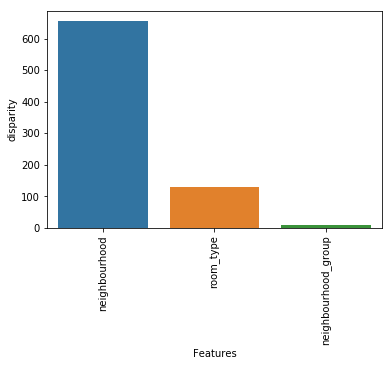

In [163]:
cat=[f for f in df.columns if df.dtypes[f]=='object']
def anova(frame):
    anova_data=pd.DataFrame()
    anova_data['Features']=cat
    pvals=[]
    for c in cat:
        samples=[]
        for cls in frame[c].unique():
            s=frame[frame[c]==cls]['price'].values
            samples.append(s)
        pval=stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anova_data['pvalues']=pvals
    return anova_data.sort_values('pvalues')
categorical['price'] = df.price.values
k = anova(categorical) 
k['disparity'] = np.log(1./k['pvalues'].values) 
sns.barplot(data=k, x = 'Features', y='disparity') 
plt.xticks(rotation=90) 
plt 

#### We can see that by performing anova test among categoriacal features and the target variable we got 'Neighbourhood' as the feature that effects price the most followed by 'room_type' . 

#### Also, from the correlation matrix we found out that there is no numeric feature that strongly affects the target variable. So the above mentioned categorical features can be considered as the best affecting features on the target feature i.e 'price'